# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте файлы [на странице задания] и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [42]:
import pandas as pd
import os
import numpy as np

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 8)

PATH_TO_DATA = 'data'

In [2]:
df_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_data.train'))
df_train

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0,600.0,NaN,20.0,480.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,82752.0,NaN,NaN,...,NaN,NESt0G8EIb,AERks4l,NaN,taul,1K8T,0LaQ,UaKK0yW,I1sFbv_0IT,NaN,NaN,EkHG,9_Y1,k13i,09_Q,IYzP,GjJ35utlTa_GNSvxxpb9ju,kIsH,NaN,uKAI,L84s,JBfYVit4g8,NaN,NaN,NaN,TDctq2l,KmRo,cJvF,FzaX,hLKtJ9p,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,NaN,NaN,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212.0,265.0,NaN,2.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2706120.0,NaN,NaN,...,NaN,P1WvyxLp3Z,2Knk1KF,NaN,taul,1K8T,YFAj,Bnunsla,o64y9zI,DlISMzi,NaN,JDd6,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,I_mbgcr,NaN,XTbqizz,qMoY,cJvF,FzaX,hN8KpA1,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,NaN,NaN,448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0,220.0,NaN,0.0,72.0,NaN,NaN,311.76,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4698780.0,NaN,NaN,...,NaN,FoxgUHSK8h,LrdZy8QqgUfkVShG,NaN,taul,1K8T,TyGl,fhk21Ss,nQUveAzAF7,NaN,NaN,dnwD,9_Y1,mTeA,VpdQ,hAFG,7M47J5GA0pTYIFxg5uy,kIsH,NaN,uKAI,L84s,4kVnq_T26xq1p,NaN,NaN,NaN,pMWBUmQ,qLXr,UYBR,FzaX,4UxGlow,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.0,415.0,NaN,0.0,144.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,864384.0,NaN,NaN,...,NaN,vNEvyxLp3Z,RO12,NaN,taul,1K8T,0Xwj,uoZk2Zj,LWyxgtXeJL,NaN,NaN,CwmB,F3hy,vzJD,VpdQ,IYzP,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJtVhC,JC0e,cJvF,FzaX,ylCK5YS,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,200.0,NaN,2.0,48.0,NaN,NaN,278.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4364880.0,NaN,NaN,...,NaN,4e7gUH7IEC,RO12,NaN,taul,1K8T,vSNn,kugYdIL,ZIXKpoNpqq,NaN,NaN,625Z,9_Y1,m_h1,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,NGZXfGp,064o,cJvF,FzaX,PYpzAu9,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,NaN,NaN,NaN,NaN,938.0,7.0,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,195.0,NaN,2.0,24.0,NaN,NaN,290.40,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,6753420.0,NaN,NaN,...,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,JLbT,qMlD1gf,CdPgMY1Z52,IjmTVSM,smXZ,gMVu,9_Y1,RVjC,VpdQ,IYzP,me75fM6ugJ,kIsH,NaN,7A3j,L84s,NhsEn4L,NaN,yUdd03L,NaN,NGZxnJM,YihF,UYBR,FzaX,U8IVcJ1,oslk,8xSqDjb,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
39996,NaN,NaN,NaN,NaN,NaN,1750.0,7.0,NaN,NaN,NaN,NaN,NaN,428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,270.0,NaN,4.0,88.0,NaN,NaN,133.12,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2197110.0,NaN,NaN,...,NaN,tr0gUH7ejg,RO12,NaN,taul,1K8T,lK27,Wtcr3WP,qzIoq9b,NaN,NaN,2qOt,9_Y1,m_h1,VpdQ,IYzP,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,TDcECyH,RDJ5,cJvF,FzaX,5ZxD5lR,oslk,WUmqPCU,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN
39997,NaN,NaN,NaN,NaN,NaN,1204.0,7.0,NaN,NaN,NaN,NaN,NaN,2276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,195.0,NaN,6.0,72.0,NaN,NaN,153.20,NaN

In [3]:
labels_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'orange_small_churn_labels.train'), header=None, squeeze=True)
labels_train

0       -1
1       -1
2       -1
3        1
4       -1
        ..
39995   -1
39996   -1
39997   -1
39998   -1
39999   -1
Name: 0, Length: 40000, dtype: int64

2\. Рассчитайте доли классов `отток` и `не отток`.

Абсолбтные значения:

In [4]:
labels_train.value_counts()

-1    37024
 1     2976
Name: 0, dtype: int64

Доли:

In [5]:
labels_train.value_counts(normalize=True)

-1    0.9256
 1    0.0744
Name: 0, dtype: float64

- отток: 7,4%
- не отток: 92,6%

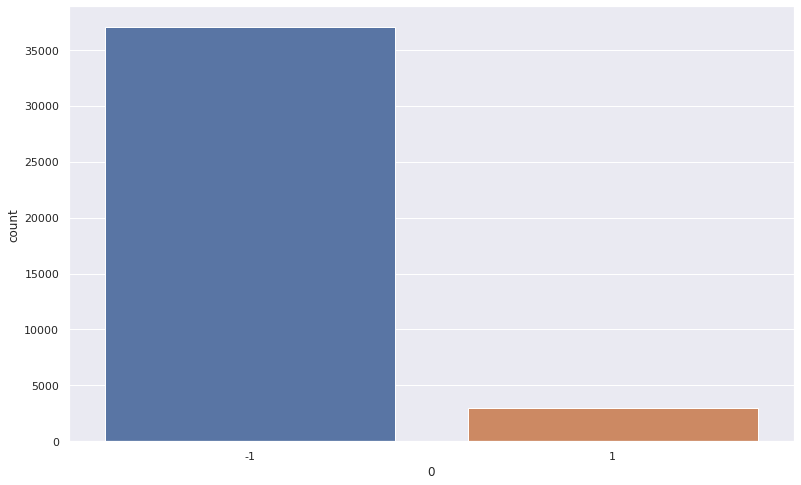

In [13]:
sns.countplot(x=labels_train);

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://stepik.org/lesson/90035/step/3?unit=66281 

Удалим полностью NaN колонки

In [7]:
df_train.dropna(axis=1, how='all', inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 212 entries, Var1 to Var229
dtypes: float64(173), int64(1), object(38)
memory usage: 64.7+ MB


In [9]:
not_nans = df_train.describe().loc['count'].sort_values()

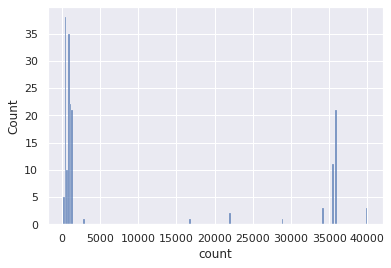

In [115]:
sns.histplot(not_nans);

Много NaN'ов

In [10]:
df_train['target'] = labels_train

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


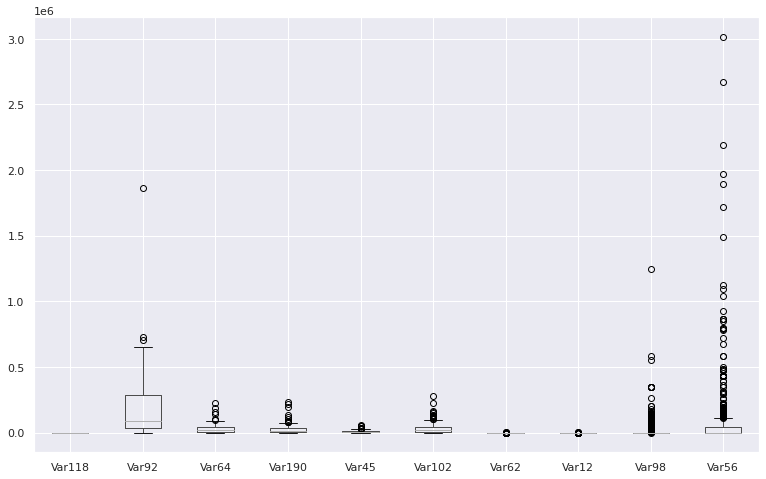

In [18]:
df_train.boxplot(column=not_nans[:10].index.to_list());

Мало NaN'ов

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


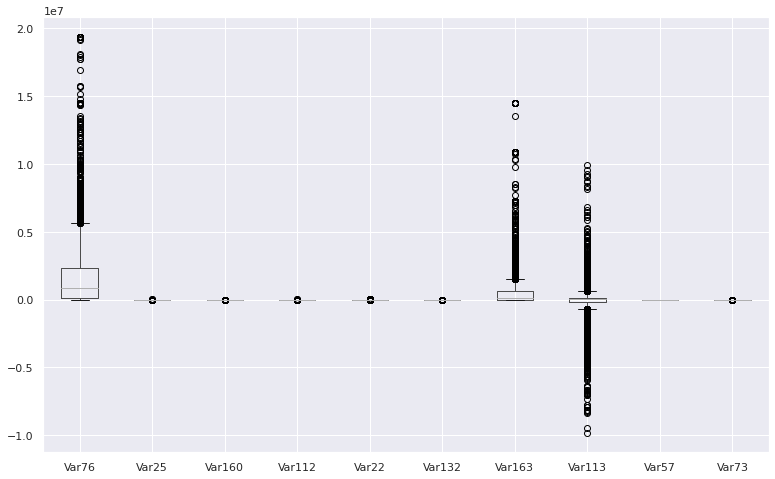

In [19]:
df_train[not_nans[-10:].index].boxplot();

Пример

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


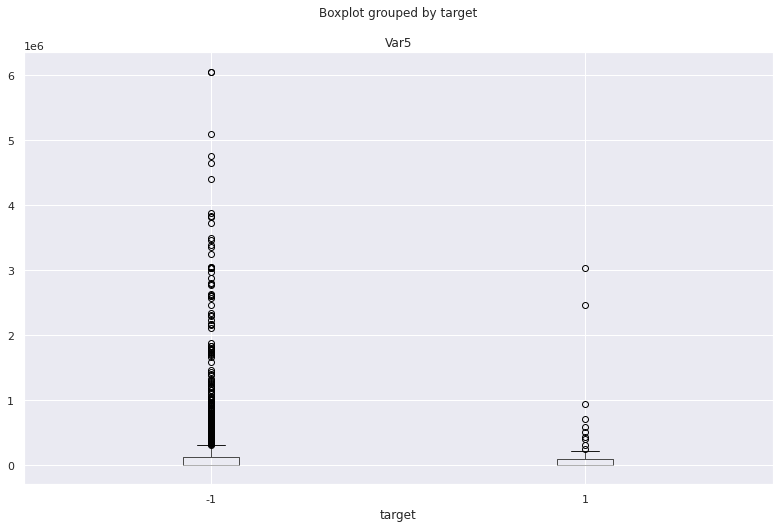

In [41]:
df_train.boxplot(column=['Var5'], by='target');

In [36]:
medians = df_train.groupby('target').median()
medians

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,...,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,0.0,0.0,0.0,0.0,0.0,861.0,7.0,20.0,0.0,8.0,0.0,252.0,0.0,129.64,0.0,0.0,0.0,144.0,180.0,0.0,2.0,48.0,0.0,0.0,220.08,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1245708.0,0.0,7.0,0.0,0.0,4044.08,0.0,0.0,...,2.0,24.0,51338.0,0.0,0.0,6.0,8100880.0,351592.0,0.0,70.0,8.0,0.0,0.0,22.0,0.0,0.0,134508.0,0.0,0.0,0.0,329.84,0.0,165183.3,7.0,0.0,0.0,0.0,0.0,5.0,0.0,2419200.0,0.0,101583.0,0.0,0.0,0.0,4.0,193.98,270.0,12668.94
1,8.0,0.0,0.0,0.0,0.0,791.0,7.0,34.0,0.0,8.0,8.0,52.0,0.0,144.88,0.0,0.0,0.0,140.0,175.0,0.0,2.0,48.0,0.0,0.0,220.08,0.0,5.0,0.0,0.0,0.0,21188.0,0.0,1568862.0,0.0,21.0,0.0,0.0,6142.18,4.0,0.0,...,2.0,24.0,61096.0,0.0,0.0,6.0,8436480.0,691200.0,0.0,119.0,4.0,0.0,0.0,20.0,0.0,0.0,145740.0,0.0,0.0,0.0,279.36,0.0,166287.6,7.0,0.0,0.0,0.0,0.0,10.0,0.0,4194547.0,0.0,390504.0,0.0,0.0,0.0,6.0,241.14,222.0,8615.25


In [37]:
means = df_train.groupby('target').mean()
means

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,...,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,10.900935,0.005181,436.173237,0.147541,252273.706041,1335.855240,6.923846,47.121495,376455.246168,8.564315,15.64977,1282.256041,0.717842,119.647937,10.684426,6.585246,0.221311,235.149668,290.777527,7.357980,4.539214,96.834584,0.070334,0.027051,223.872713,0.018692,7.654206,136864.607656,1.202073,0.703269,158193.649741,641437.185246,2.568717e+06,11.854922,27.306542,3.601036,0.167826,7211.155836,15.407254,2.482243,...,1.689811,143.062218,295945.232212,149307.504098,10.577352,8.360656,6.175110e+06,1.611016e+06,0.803279,165.839015,33.540636,1.965517,4.64456,39.130953,3.459836,332941.840415,485132.458744,1.706557,30410.779610,22.55275,334.840224,2.281865,374795.858405,9.884581,0.006387,7.232787,4.070539,6.088397e+05,15.140845,2.95082,3.804263e+06,0.609007,1.404086e+06,80083.852850,7.307772,3.543925,15.891589,162.883275,273.622350,22970.571361
1,12.571429,0.000000,268.390244,0.163636,185323.839286,1130.382022,5.217486,53.085714,478212.107143,8.195122,27.20000,799.364663,0.146341,120.345714,8.000000,5.018182,0.818182,218.734324,270.684833,3.839286,4.132816,89.009681,0.053571,0.000000,229.432447,0.000000,7.142857,38779.636364,0.585366,0.790606,216187.024390,603484.690909,2.646388e+06,10.146341,28.800000,2.195122,0.164575,6250.570667,22.439024,1.828571,...,1.464286,91.285714,325481.906019,194886.000000,6.545455,9.272727,6.326563e+06,1.469285e+06,0.727273,185.800000,19.219512,1.727273,5.04878,34.299032,4.745455,377503.024390,495607.744711,1.472727,22179.939394,12.12500,276.788571,2.780488,333225.492279,9.000000,0.011474,5.381818,2.146341,1.010588e+06,10.740741,2.00000,4.124426e+06,0.629975,1.342472e+06,94627.219512,10.048780,3.085714,18.571429,217.478049,233.422713,17753.648824


In [48]:
top_correlated = (means.loc[1] - means.loc[-1]).abs().sort_values(ascending=False)[:20]
top_correlated

Var131    1.034608e+07
Var69     4.808584e+05
Var53     4.389077e+05
Var177    4.017487e+05
Var180    3.201630e+05
Var114    2.416347e+05
Var111    1.931651e+05
Var113    1.628422e+05
Var153    1.514534e+05
Var154    1.417316e+05
Var59     1.306361e+05
Var124    1.220040e+05
Var10     1.017569e+05
Var33     9.808497e+04
Var139    9.586470e+04
Var38     7.767100e+04
Var5      6.694987e+04
Var182    6.161478e+04
Var36     5.799337e+04
Var92     5.758846e+04
dtype: float64

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?